# Proyek Analisis Data: E-Commerce
- **Nama:** Jessica Vega Nainggolan
- **Email:** veganainggolan9560@gmail.com
- **ID Dicoding:** jessicaavg

## Menentukan Pertanyaan Bisnis

- Apa metode pembayaran yang paling sering digunakan orang ketika melakukan pembelian di e-commerce Brazil?
- Bagaimana perbandingan banyaknya pembelian dalam setiap tahun? Dan berapa jumlah rata-rata pembelian per bulannya pada tahun dengan jumlah pembelian terbanyak?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

**Customers Dataset**

In [3]:
customers_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/customers_dataset.csv')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Geolocation Dataset**

In [4]:
geolocation_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Order Items Dataset**

In [5]:
order_items_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Order Payments Dataset**

In [6]:
order_payments_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Order Reviews Dataset**

In [7]:
order_reviews_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Order Dataset**

In [8]:
order_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/orders_dataset.csv')
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Product Category Name Translation**

In [9]:
product_category_name = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Products Dataset**

In [10]:
products_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/products_dataset.csv')
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Sellers Dataset**

In [11]:
seller_data = pd.read_csv('/content/drive/MyDrive/Dicoding - Python/E-Commerce Public Dataset/sellers_dataset.csv')
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

####**Menilai Data (customers_data)**

In [12]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah data duplikasi: ", customers_data.duplicated().sum())

Jumlah data duplikasi:  0


In [15]:
customers_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####**Menilai Data (geolocation_data)**


In [16]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_data.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah data duplikasi:", geolocation_data.duplicated().sum())

Jumlah data duplikasi: 261831


Terdapat data duplikat sebanyak 261831 data pada geolocation_data.

In [19]:
geolocation_data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


####**Menilai Data ( order_items_data )**

In [20]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada dataset order_items_data terdapat kesalahan tipe data pada kolom **shipping_limit_date** yang seharusnya bertipe data **datetime**.

In [21]:
order_items_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print("Jumlah data duplikasi:", order_items_data.duplicated().sum())

Jumlah data duplikasi: 0


In [23]:
order_items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####**Menilai Data (order_payments_data)**

In [24]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payments_data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
print("Jumlah data duplikasi: ", order_payments_data.duplicated().sum())

Jumlah data duplikasi:  0


In [27]:
order_payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####**Menilai Data (order_reviews_data)**

In [28]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Pada dataset order_reviews_data terdapat kesalahan tipe data pada kolom **review_creation_date** dan **review_answer_timestamp** yang seharusnya bertipe data **datetime**.

In [29]:
order_reviews_data.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat missing value pada kolom **review_comment_title** dan kolom **review_comment_message**.

In [30]:
print("Jumlah data duplikasi: ", order_reviews_data.duplicated().sum())

Jumlah data duplikasi:  0


In [31]:
order_reviews_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####**Menilai Data (order_data)**

In [32]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pada dataset order_data terdapat kesalahan tipe data pada beberapa kolom, yaitu:

- kolom order_purchase_timestamp
- kolom order_approved_at
- kolom order_delivered_carrier_date
- kolom order_delivery_customer_date
- kolom order_estimated_delivery_date

Kolom-kolom tersebut seharusnya bertipe data **datetime**.




In [33]:
order_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing value pada kolom order_approved_at, kolom order_delivered_carrier_date, dan kolom order_delivered_customer_date.

In [34]:
print("Jumlah data duplikasi: ", order_data.duplicated().sum())

Jumlah data duplikasi:  0


In [35]:
order_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####**Menilai Data (product_category_name)**

In [36]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
product_category_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
print("Jumlah data duplikasi: ", product_category_name.duplicated().sum())

Jumlah data duplikasi:  0


In [39]:
product_category_name.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####**Menilai Data (products_data)**

In [40]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
products_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing value pada semua kolom kecuali kolom product_id.



In [42]:
print("Jumlah data duplikasi: ", products_data.duplicated().sum())

Jumlah data duplikasi:  0


In [43]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####**Menilai Data (seller_data)**

In [44]:
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
seller_data.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
print("Jumlah data duplikasi: ", seller_data.duplicated().sum())

Jumlah data duplikasi:  0


In [47]:
seller_data.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

####**Membersihkan Data (geolocation_data)**

Menghilangkan data yang memiliki duplikat



In [48]:
geolocation_data.drop_duplicates(inplace=True)

In [49]:
print("Jumlah duplikasi data: ", geolocation_data.duplicated().sum())

Jumlah duplikasi data:  0


####**Membersihkan Data (order_items_data)**

Mengubah tipe data shipping_limit_date menjadi **datetime**.

In [50]:
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'])

In [51]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Tipe data pada kolom shipping_limit_date sudah menjadi **datetime**.

####**Membersihkan Data (order_reviews_data)**

* Mengubah tipe data pada kolom **review_creation_date** dan kolom **review_answer_timestamp** menjadi **datetime**.


In [52]:
order_reviews_data['review_creation_date'] = pd.to_datetime(order_reviews_data['review_creation_date'])

In [53]:
order_reviews_data['review_answer_timestamp'] = pd.to_datetime(order_reviews_data['review_answer_timestamp'])

In [54]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Tipe data pada kolom **review_creation_date** dan kolom **review_answer_timestamp** sudah menjadi **datetime**.

* Menangani Missing Value (kolom review_comment_title dan kolom review_comment_message)

In [55]:
order_reviews_data.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [56]:
order_reviews_data[order_reviews_data.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [57]:
order_reviews_data[order_reviews_data.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


Menghapus kolom **order_comment_title** dan **order_comment_message** karena tidak digunakan dalam proses analisis.

In [58]:
order_reviews_data.drop('review_comment_title',axis=1, inplace=True)

In [59]:
order_reviews_data.drop('review_comment_message', axis=1, inplace=True)

In [60]:
order_reviews_data.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Sudah tidak ada missing value pada dataset **order_reviews_data**.

####**Membersihkan Data (order_data)**

* Mengubah tipe data pada beberapa kolom (**kolom order_purchase_timestamp, kolom order_approved_at, kolom order_delivered_carrier_date, kolom order_delivery_customer_date, kolom order_estimated_delivery_date**) menjadi tipe data **datetime**.


In [61]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])

In [62]:
order_data['order_approved_at'] = pd.to_datetime(order_data['order_approved_at'])

In [63]:
order_data['order_delivered_carrier_date'] = pd.to_datetime(order_data['order_delivered_carrier_date'])

In [64]:
order_data['order_delivered_customer_date'] = pd.to_datetime(order_data['order_delivered_customer_date'])

In [65]:
order_data['order_estimated_delivery_date'] = pd.to_datetime(order_data['order_estimated_delivery_date'])

In [66]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Tipe data pada beberapa kolom pada dataset order_data sudah menjadi **datetime**.

* Menangani Missing Value (kolom order_approved_at, kolom order_delivered_carrier_date, dan kolom order_delivered_customer_date)

In [67]:
#Melihat data pada kolom order_approve_at yang memiliki missing value
order_data[order_data.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [68]:
order_data.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [69]:
#Melihat data pada kolom order_delivered_carrier_date yang memiliki missing value
order_data[order_data.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [70]:
order_data.order_delivered_carrier_date.value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81018, dtype: int64

In [71]:
#Melihat data pada kolom order_delivered_customer_date yang memiliki missing value
order_data[order_data.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [72]:
order_data.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

Dikarenakan tidak ada nilai yang mendominasi untuk mengisi missing value, maka data yang memiliki missing value dihapus.

Menghapus Missing Value

In [73]:
order_data.dropna(axis=0, inplace=True)

In [74]:
order_data.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Terlihat sudah tidak ada missing value pada data order_data.

####**Membersihkan Data (products_data)**

Menangani Missing Value

In [75]:
#Melihat data pada kolom product_category_name yang memiliki missing value
products_data[products_data.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [76]:
products_data['product_category_name'].mode().iloc[0]

'cama_mesa_banho'

In [77]:
#Mengisi missing value pada kolom product_category_name dengan nilai modus
products_data['product_category_name'].fillna(value=products_data['product_category_name'].mode().iloc[0], inplace=True)

In [78]:
products_data.product_name_lenght.mean()

48.47694876472589

In [79]:
#Mengisi missing value pada kolom product_name_lenght dengan nilai rata-rata
products_data.product_name_lenght.fillna(value=products_data.product_name_lenght.mean(), inplace=True)

In [80]:
products_data.product_description_lenght.mean()

771.4952846232337

In [81]:
#Mengisi missing value pada kolom product_description_lenght dengan nilai rata-rata
products_data.product_description_lenght.fillna(value=products_data.product_description_lenght.mean(), inplace=True)

In [82]:
products_data['product_photos_qty'].mode().iloc[0]

1.0

In [83]:
#Mengisi missing value pada kolom product_photos_qty dengan nilai modus
products_data['product_photos_qty'].fillna(value=products_data['product_photos_qty'].mode().iloc[0], inplace=True)

In [84]:
products_data.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [85]:
products_data.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Terlihat sudah tidak ada lagi missing value pada data products_data.

#### Membuat CSV baru dari semua dataset yang sudah bersih dari missing value

In [86]:
geolocation_data.to_csv("geolocation_data_true.csv", index=False)

In [87]:
order_items_data.to_csv("order_items_data_true.csv", index=False)

In [88]:
order_reviews_data.to_csv("order_reviews_data_true.csv", index=False)

In [89]:
order_data.to_csv("order_data_true.csv", index=False)

In [90]:
products_data.to_csv("products_data_true.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Data **order_payments_data**

In [91]:
order_payments_data.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [92]:
order_payments_data.corr()

<ipython-input-92-99fb61bc0a34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  order_payments_data.corr()


,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


In [93]:
order_payments_data.groupby(by="payment_type").agg(lambda x: x.mode().iloc[0])

,order_id,payment_sequential,payment_installments,payment_value
payment_type,,,,
boleto,00048cc3ae777c65dbb7d2a0634bc1ea,1,1,77.57
credit_card,01358622f65717728b3b2ec2cf4e8812,1,1,77.57
debit_card,a4431cbd79dbddaae7988ce6091cbc3c,1,1,35.00
not_defined,00b1cb0320190ca0daa2c88b35206009,1,1,0.00
voucher,fa65dad1b0e818e3ccc5cb0e39231352,2,1,50.00


In [94]:
payment_counts = order_payments_data.groupby("payment_type").size()

In [95]:
pd.DataFrame(payment_counts, columns=["Jumlah"]).sort_values(by="Jumlah", ascending=False)

,Jumlah
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


Dari output diatas, dapat dilihat bahwa metode pembayaran yang paling banyak digunakan dalam e-commerce adalah dengan metode **credit_card** sebanyak 76.795 pengguna.

In [96]:
order_payments_data.groupby(by="payment_type").agg({
    "payment_value": ["max"]
})

,payment_value
,max
payment_type,
boleto,7274.88
credit_card,13664.08
debit_card,4445.50
not_defined,0.00
voucher,3184.34


Jumlah pembayaran paling banyak terdapat pada metode **credit card** juga.

### Explore Data **order_data**

In [97]:
order_data.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered    96455
canceled         6
Name: customer_id, dtype: int64

Dari hasil output di atas, dapat disimpulkan bahwa **mayoritas status pesanan adalah "delivered" (telah terkirim), dengan jumlah 96.455 pesanan**. Hanya ada sedikit **pesanan yang memiliki status "canceled" (dibatalkan), yaitu 6 pesanan**. Hal ini menunjukkan bahwa sebagian besar pesanan telah berhasil diproses dan dikirim kepada pelanggan, sedangkan jumlah pesanan yang dibatalkan sangat sedikit. Dengan demikian, disimpulkan bahwa sebagian besar proses pemesanan berjalan lancar karena hanya sedikit kasus pembatalan pesanan.

In [98]:
delivery_time = order_data["order_delivered_customer_date"] - order_data["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_data["delivery_time"] = round(delivery_time/86400)

In [99]:
order_data[['customer_id', 'order_approved_at', 'order_delivered_customer_date', 'delivery_time']].head()

,customer_id,order_approved_at,order_delivered_customer_date,delivery_time
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,8.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-08-07 15:27:45,13.0
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-17 18:06:29,9.0
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-12-02 00:28:42,13.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-16 18:17:02,3.0


In [100]:
order_data.delivery_time.mean()

12.119478338395828

Dari output diatas, diketahui bahwa rata rata waktu pesanan ditangani oleh mitra hingga pesanan diberikan ke pembeli adalah **12 hari** dari saat pesanan disetujui hingga diterima oleh pembeli.


In [101]:
orders_per_year = order_data.groupby(order_data['order_approved_at'].dt.year).size()
print("Jumlah pesanan per tahun:", orders_per_year)

Jumlah pesanan per tahun: order_approved_at
2016      272
2017    43354
2018    52835
dtype: int64


Output diatas menunjukkan bahwa jumlah pesanan yang disetujui pada tahun 2016 adalah 272, pada tahun 2017 adalah 43.354, dan pada tahun 2018 adalah 52.835. Tahun dengan jumlah order terbanyak adalah **tahun 2018**. Hal ini mengindikasikan bahwa jumlah pesanan yang disetujui mengalami peningkatan dari tahun ke tahun dan menunjukkan adanya pertumbuhan bisnis yang signifikan dalam hal jumlah pesanan yang diterima.

In [102]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])

start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2019-01-01')
orders_2018 = order_data[(order_data['order_purchase_timestamp'] >= start_date) & (order_data['order_purchase_timestamp'] < end_date)]

orders_2018['order_month'] = orders_2018['order_purchase_timestamp'].dt.month

bulan_orders_2018 = orders_2018.groupby('order_month').size()

rata_orders_per_month_2018 = bulan_orders_2018.mean()

print("Rata-rata", rata_orders_per_month_2018)

Rata-rata 6597.25


<ipython-input-102-99b578d8d64c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2018['order_month'] = orders_2018['order_purchase_timestamp'].dt.month


Dari output diatas diketahui bahwa rata-rata pembelian per bulan pada tahun 2018 adalah **6.597 pesanan per bulan**.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa metode pembayaran yang paling sering digunakan orang ketika belanja di e-commerce Brazil?

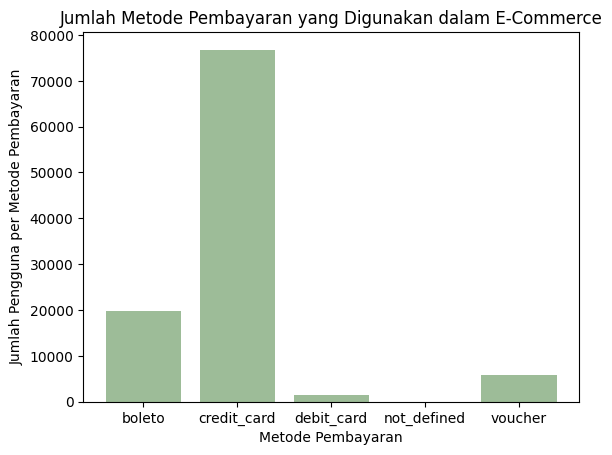

In [103]:
payment_method = ('boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher')
votes = (19784, 76795, 1529, 3, 5775)
plt.title('Jumlah Metode Pembayaran yang Digunakan dalam E-Commerce')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pengguna per Metode Pembayaran')
plt.bar(x=payment_method, height=votes, color='#9DBC98')
plt.show()

Dari hasil visualisasi diatas, dapat dilihat bahwa metode pembayaran pada e-commerce brazilian ada 4, yaitu boleto, credit card, debit card, voucher, dan ada beberapa yang tidak diketahui. Metode pembayaran yang paling sering digunakan ketika berbelanja adalah **credit card** dengan jumlah pengguna sebanyak **76.795 orang**.

### Pertanyaan 2: Bagaimana perbandingan banyaknya pembelian dalam setiap tahun? Dan berapa jumlah rata-rata pembelian per bulannya pada tahun dengan jumlah pembelian terbanyak?

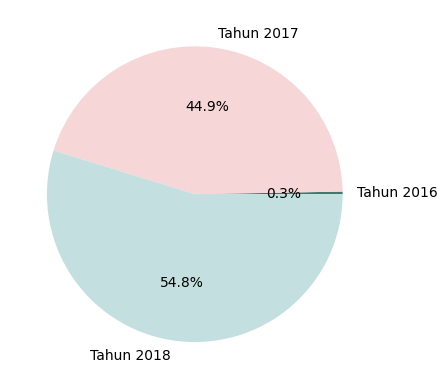

In [104]:
year = ('Tahun 2016', 'Tahun 2017', 'Tahun 2018')
votes = (272, 43354, 52835)
color = ('#43766C', '#F6D6D6', '#C4DFDF')
explode = (0, 0, 0)

plt.pie(
    x = votes,
    labels = year,
    autopct = '%1.1f%%',
    colors = color,
    explode = explode
)
plt.show()

Dari pie chart diatas, dapat dilihat bahwa pembelian yang paling banyak terdapat pada **tahun 2018 sebanyak 54,8%** dan pembelian tahun 2017 sebanyak 44,9%. Pembelian paling sedikit terdapat pada tahun 2016, yaitu sebanyak 0,3% dari keseluruhan catatan pembelian.

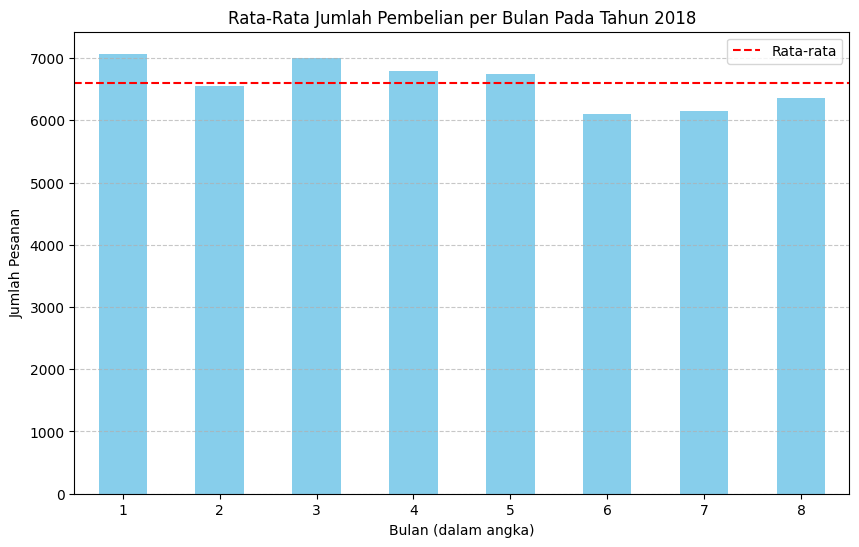

In [105]:
plt.figure(figsize=(10, 6))
bulan_orders_2018.plot(kind='bar', color='skyblue')
plt.title('Rata-Rata Jumlah Pembelian per Bulan Pada Tahun 2018')
plt.xlabel('Bulan (dalam angka)')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(rata_orders_per_month_2018, color='red', linestyle='--', linewidth=1.5, label='Rata-rata')
plt.legend()
plt.show()

Dari grafik diatas, dapat dilihat bahwa rata-rata jumlah pembelian per bulan pada tahun 2018 secara signifikan tidak berbeda jauh. **Rata-rata jumlah pembelian yang paling banyak terdapat pada bulan 1 (januari)** dan **paling sedikit pada bulan 6 (juni)**. Pada dataset hanya memiliki daftar pembelian hingga bulan ke-8 (agustus). Jika seandainya data pembelian lengkap hingga akhir tahun, tidak menutup kemungkinan di bulan berikutnya terjadi peningkatan pembelian yang melampaui banyaknya pembelian di bulan 1.

## Conclusion

- Credit card (kartu kredit) menjadi metode pembayaran yang paling banyak digunakan pada e-commerce Brazil.
- 2018 menjadi tahun dengan pembelian terbanyak pada e-commerce Brazil dibandingkan dengan tahun 2016 dan 2017. Dari peningkatan jumlah pemesanan tersebut, terlihat jelas bahwa setiap tahun jumlah orang yang melakukan pemesanan online semakin bertambah.